# Data Analysis with R
## Population Estimates using Python

### Initial Data Import & Analysis

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt


%matplotlib inline
pd.options.display.float_format = '{:.5f}'.format


SyntaxError: invalid syntax (<ipython-input-9-bdd0151c24be>, line 10)

In [23]:
#Import data

dir_path = os.path.join(os.path.pardir, "data", "interim")
train_file = os.path.join(dir_path,"population.csv")

train_df = pd.read_csv(train_file)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 15 columns):
Geographic Area    57 non-null object
Census             57 non-null int64
Estimates Base     57 non-null int64
2010               57 non-null int64
2011               57 non-null int64
2012               57 non-null int64
2013               57 non-null int64
2014               57 non-null int64
2015               57 non-null int64
2016               57 non-null int64
2017               0 non-null float64
2018               0 non-null float64
2019               0 non-null float64
2020               0 non-null float64
2021               0 non-null float64
dtypes: float64(5), int64(9), object(1)
memory usage: 6.8+ KB


In [64]:
train_df.head()

,Census,Estimates Base,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
Geographic Area,,,,,,,,,,,,,,
Alabama,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300,NaN,NaN,NaN,NaN,NaN
Alaska,710231,710249,714031,722713,731089,736879,736705,737709,741894,NaN,NaN,NaN,NaN,NaN
Arizona,6392017,6392301,6408312,6467163,6549634,6624617,6719993,6817565,6931071,NaN,NaN,NaN,NaN,NaN
Arkansas,2915918,2916025,2921995,2939493,2950685,2958663,2966912,2977853,2988248,NaN,NaN,NaN,NaN,NaN
California,37253956,37254522,37332685,37676861,38011074,38335203,38680810,38993940,39250017,NaN,NaN,NaN,NaN,NaN


In [6]:
train_df.describe()

,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,57.00000,57.00000,57.00000,57.00000,57.00000,57.00000,57.00000,57.00000,57.00000,0.00000,0.00000,0.00000,0.00000,0.00000
mean,16315129.87719,16315797.75439,16346773.75439,16467873.78947,16589993.42105,16705400.01754,16828513.01754,16950228.68421,17066558.70175,nan,nan,nan,nan,nan
std,44360750.28007,44362599.89657,44449553.45448,44792604.61242,45139340.06363,45466461.84737,45818476.27289,46168944.42877,46503773.57272,nan,nan,nan,nan,nan
min,563626.00000,563767.00000,564513.00000,567725.00000,576765.00000,582684.00000,583642.00000,586555.00000,585501.00000,nan,nan,nan,nan,nan
25%,1852994.00000,1853011.00000,1854230.00000,1854972.00000,1856560.00000,1868559.00000,1881145.00000,1893765.00000,1907116.00000,nan,nan,nan,nan,nan
50%,4625364.00000,4625410.00000,4635943.00000,4672637.00000,4720760.00000,4767894.00000,4828430.00000,4853875.00000,4863300.00000,nan,nan,nan,nan,nan
75%,9535483.00000,9535688.00000,9558915.00000,9650963.00000,9746175.00000,9841590.00000,9915767.00000,9917715.00000,9928300.00000,nan,nan,nan,nan,nan
max,308745538.00000,308758105.00000,309348193.00000,311663358.00000,313998379.00000,316204908.00000,318563456.00000,320896618.00000,323127513.00000,nan,nan,nan,nan,nan


In [24]:
train_df["Area"] = train_df["Geographic Area"]
train_df["Base"] = train_df["Estimates Base"]

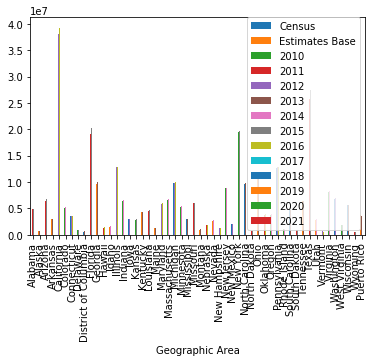

In [57]:
train_df.iloc[:-6,:].plot(kind="Bar")

In [11]:

%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

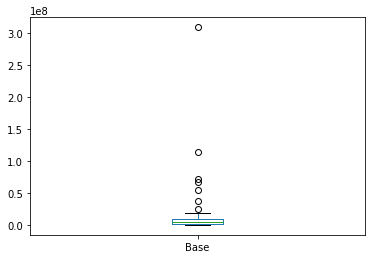

In [17]:
train_df.groupby("Area").Base.mean().plot(kind="box")

In [34]:
# Remove Regions and Country Observations
#train_df.iloc[:-6,:].sort_values(by="Area", inplace=True)
train_df_temp = train_df.iloc[:-6,:].copy(deep=True)
#train_df_temp.sort_values(by="Area", inplace=True)

In [35]:
train_df_temp.sort_values(by="Area", inplace=True)

In [33]:
train_df_temp

,Geographic Area,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Area,Base
0,Alabama,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300,nan,nan,nan,nan,nan,Alabama,4780131
1,Alaska,710231,710249,714031,722713,731089,736879,736705,737709,741894,nan,nan,nan,nan,nan,Alaska,710249
2,Arizona,6392017,6392301,6408312,6467163,6549634,6624617,6719993,6817565,6931071,nan,nan,nan,nan,nan,Arizona,6392301
3,Arkansas,2915918,2916025,2921995,2939493,2950685,2958663,2966912,2977853,2988248,nan,nan,nan,nan,nan,Arkansas,2916025
4,California,37253956,37254522,37332685,37676861,38011074,38335203,38680810,38993940,39250017,nan,nan,nan,nan,nan,California,37254522
5,Colorado,5029196,5029324,5048644,5118360,5189867,5267603,5349648,5448819,5540545,nan,nan,nan,nan,nan,Colorado,5029324
6,Connecticut,3574097,3574114,3579899,3589893,3593795,3596003,3591873,3584730,3576452,nan,nan,nan,nan,nan,Connecticut,3574114
7,Delaware,897934,897936,899816,907924,916993,925395,934948,944076,952065,nan,nan,nan,nan,nan,Delaware,897936
8,District of Columbia,601723,601766,605183,620477,635327,649165,659005,670377,681170,nan,nan,nan,nan,nan,District of Columbia,601766
9,Florida,18801310,18804592,18849098,19096952,19344156,19582022,19888741,20244914,20612439,nan,nan,nan,nan,nan,Florida,18804592


In [116]:
ri_df = train_df_temp[train_df_temp.Area == "Rhode Island"]
ri_df

,Geographic Area,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Area,Base
39,Rhode Island,1052567,1052940,1053337,1052451,1052901,1053033,1054480,1055607,1056426,nan,nan,nan,nan,nan,Rhode Island,1052940


In [117]:
#ri_df.set_index("Area")
ri_df.drop(columns=["Geographic Area", "Census", "Estimates Base", "Base"], axis=1, inplace=True)

In [118]:
#ri_df.set_index("Area")
ri_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Area
39,1053337,1052451,1052901,1053033,1054480,1055607,1056426,nan,nan,nan,nan,nan,Rhode Island


In [137]:
ri_df.columns.values

array(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', 'Area'], dtype=object)

In [97]:
ri.drop("Area", axis=0, inplace=True)

In [101]:
ri.ix[:0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,39,Year


In [102]:
ri.reset_index()

,index,39,Year
0,2010,1053337,2010
1,2011,1052451,2011
2,2012,1052901,2012
3,2013,1053033,2013
4,2014,1054480,2014
5,2015,1055607,2015
6,2016,1056426,2016
7,2017,NaN,2017
8,2018,NaN,2018
9,2019,NaN,2019


In [109]:
ri.ix[:1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,39,Year
2010,1053337,2010
